In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob as g

In [2]:
lasco_files = np.sort(g.glob("C:/Users/ybaru/OneDrive/Desktop/Space_Astro_class/Test datasets/CT_dataset2/*.fts"))

### Plotting the raw image file

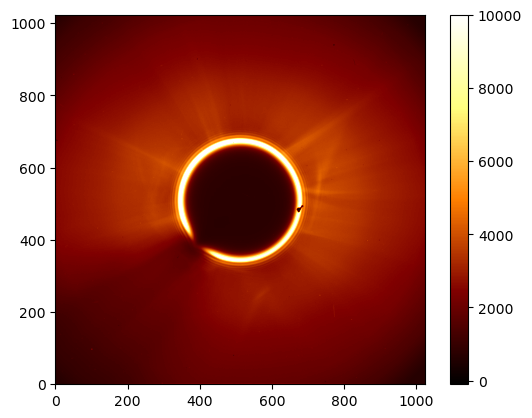

In [3]:
lasco_img1 = fits.open(lasco_files[1])

data1 = lasco_img1[0].data
header1 = lasco_img1[0].header

plt.imshow(data1, vmin=-100, vmax=10000, cmap='afmhot', origin='lower')
plt.colorbar()

### Subtracting the background

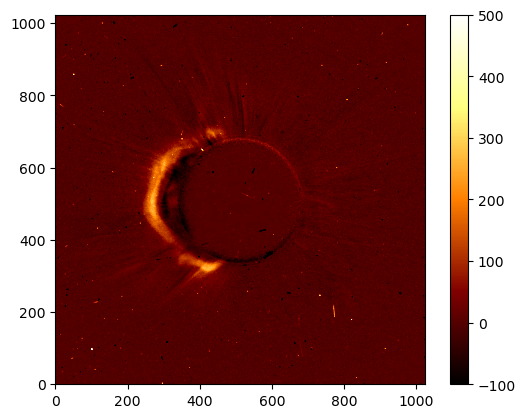

In [4]:
background_img = fits.open(lasco_files[0])

data_background = background_img[0].data
header_background = background_img[0].header
subtracted_data1 = data1 - data_background

plt.imshow(subtracted_data1,vmin=-100, vmax=500,cmap='afmhot', origin='lower')
plt.colorbar()

Text(10, 10, '2022/04/11 21:48:06.344')

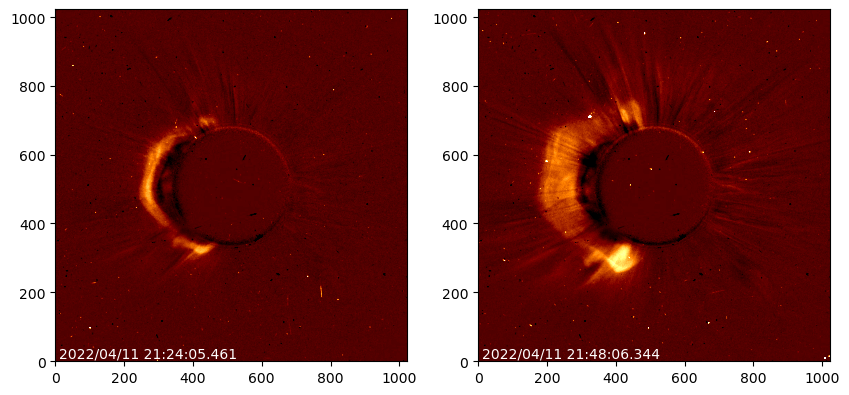

In [5]:
lasco_img2 = fits.open(lasco_files[2])

data2 = lasco_img2[0].data
header2 = lasco_img2[0].header

subtracted_data2 = data2 - data_background

fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(subtracted_data1, vmin=-100, vmax=500, cmap='afmhot', origin='lower')
plt.text(10, 10, header1['DATE-OBS'] + ' ' + header1['TIME-OBS'], color='white')

fig.add_subplot(1, 2, 2)
plt.imshow(subtracted_data2, vmin=-100, vmax=500, cmap='afmhot', origin='lower')
plt.text(10, 10, header2['DATE-OBS'] + ' ' + header2['TIME-OBS'], color='white')

### Based on header information, calculating the distance of a pixel in physical units (km) from center of the solar disk

#### Red cross is the solar disk center, white cross is the pixel we choose.

Text(10, 10, '2022/04/11 21:48:06.344')

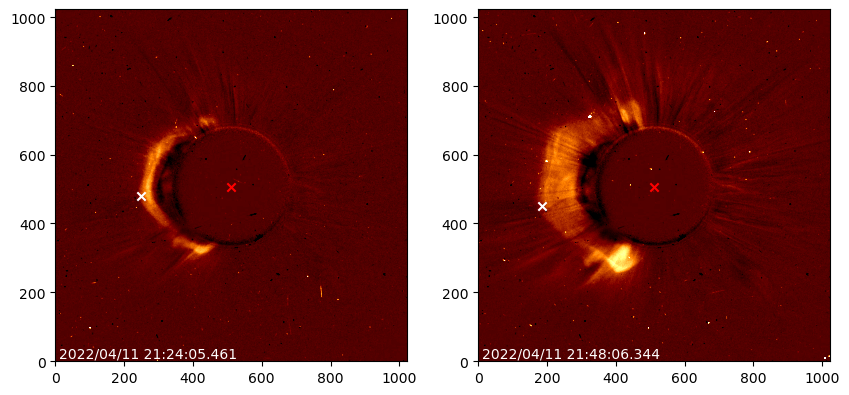

In [6]:
fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(subtracted_data1, vmin=-100, vmax=500, cmap='afmhot', origin='lower')
plt.scatter(header1['CRPIX1'], header1['CRPIX2'], c='r', marker='x')
plt.scatter(250, 480, c='white', marker='x')
plt.text(10, 10, header1['DATE-OBS'] + ' ' + header1['TIME-OBS'], color='white')

fig.add_subplot(1, 2, 2)
plt.imshow(subtracted_data2, vmin=-100, vmax=500, cmap='afmhot', origin='lower')
plt.scatter(header2['CRPIX1'], header2['CRPIX2'], c='r', marker='x')
plt.scatter(185, 450, c='white', marker='x')
plt.text(10, 10, header2['DATE-OBS'] + ' ' + header2['TIME-OBS'], color='white')

In [11]:
r_pix1 = np.sqrt((250 - header1['CRPIX1'])**2 + (480 - header1['CRPIX2'])**2)   
r_pix2 = np.sqrt((185 - header2['CRPIX1'])**2 + (450 - header2['CRPIX2'])**2)   

r_arcs1 = r_pix1*header1['CDELT1']
r_arcs2 = r_pix2*header2['CDELT2']

r_solr1 = r_arcs1/959
r_solr2 = r_arcs2/959

r_km1 = r_solr1*695700
r_km2 = r_solr2*695700

print("Distane of the chosen pixel from disk center = ", np.abs(r_km2 - r_km1), "km")

Distane of the chosen pixel from disk center =  592082.2715596315 km
